# Comprehensive Advanced Plotting Guide

Welcome to this complete educational guide on **Advanced Data Visualization with Python**! This notebook covers everything from basic matplotlib to interactive dashboards, providing you with a complete toolkit for data visualization.

## 🎯 Learning Objectives

By the end of this notebook, you will master:

1. **Data Preprocessing for Visualization** - Preparing data for different chart types
2. **Matplotlib Fundamentals** - Core plotting library and customization
3. **Advanced Chart Types** - Area plots, histograms, box plots, scatter plots, and more
4. **Specialized Visualizations** - Waffle charts, word clouds, and statistical plots
5. **Interactive Plotting with Plotly** - Creating dynamic, interactive visualizations
6. **Geospatial Visualization** - Maps and geographic data with Folium
7. **Dashboard Development** - Building interactive dashboards with Dash
8. **Real-world Applications** - Practical examples with immigration and airline data

## 📊 What We'll Build

We'll create a comprehensive visualization toolkit covering:
- **Static Visualizations**: Professional charts and graphs
- **Interactive Plots**: Dynamic visualizations with hover effects and zoom
- **Geographic Maps**: Location-based data visualization
- **Interactive Dashboards**: Web-based analytical applications

---

Let's begin our comprehensive journey into advanced data visualization!

In [33]:
# Essential Library Imports for Advanced Plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
%matplotlib inline
plt.style.use('default')
mpl.style.use('ggplot')  # Optional: for ggplot-like style
sns.set_palette("husl")

print("✅ Core libraries imported successfully!")
print("🎨 Plotting environment configured!")
print(f"📊 Matplotlib version: {mpl.__version__}")
print(f"🎯 Seaborn version: {sns.__version__}")

✅ Core libraries imported successfully!
🎨 Plotting environment configured!
📊 Matplotlib version: 3.8.4
🎯 Seaborn version: 0.13.2


## 1. Data Loading and Preparation

The foundation of any great visualization is quality data. Let's load our primary dataset and prepare it for various visualization techniques.

### Dataset: Immigration to Canada (1980-2013)
We'll use the Canadian Immigration dataset which contains annual data on international migration flows. This dataset is perfect for demonstrating various visualization techniques due to its temporal, geographic, and categorical nature.

In [34]:
# Load the Canadian Immigration dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv'
df_can = pd.read_csv(url)

print("🎉 Dataset loaded successfully!")
print(f"📊 Dataset dimensions: {df_can.shape[0]} rows × {df_can.shape[1]} columns")

# Display basic information
print(f"\n📋 Dataset Overview:")
print(f"• Countries: {df_can.shape[0]}")
print(f"• Time period: 1980-2013 (34 years)")
print(f"• Data types: {df_can.dtypes.value_counts().to_dict()}")

# Show first few rows
print(f"\n🔍 First 5 rows:")
df_can.head()

🎉 Dataset loaded successfully!
📊 Dataset dimensions: 195 rows × 39 columns

📋 Dataset Overview:
• Countries: 195
• Time period: 1980-2013 (34 years)
• Data types: {dtype('int64'): 35, dtype('O'): 4}

🔍 First 5 rows:


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [35]:
# Data Preprocessing for Visualization
print("🔧 PREPROCESSING DATA FOR VISUALIZATION")
print("=" * 50)

# Set Country as index for easier data manipulation
df_can.set_index('Country', inplace=True)

# Create list of years for easy reference
years = list(map(str, range(1980, 2014)))
print(f"📅 Years available: {len(years)} years ({years[0]} to {years[-1]})")

# Check for missing values
print(f"\n🔍 Data Quality Check:")
print(f"• Missing values in dataset: {df_can.isnull().sum().sum()}")
print(f"• Total immigration records: {df_can['Total'].sum():,}")

# Display processed data structure
print(f"\n✅ Processed data ready:")
print(f"• Index: {df_can.index.name}")
print(f"• Shape: {df_can.shape}")
print(f"• Year columns: {len(years)}")

# Show summary statistics
print(f"\n📈 Immigration Summary (1980-2013):")
print(df_can[['Total']].describe())

🔧 PREPROCESSING DATA FOR VISUALIZATION
📅 Years available: 34 years (1980 to 2013)

🔍 Data Quality Check:
• Missing values in dataset: 0
• Total immigration records: 6,409,153

✅ Processed data ready:
• Index: Country
• Shape: (195, 38)
• Year columns: 34

📈 Immigration Summary (1980-2013):
               Total
count     195.000000
mean    32867.451282
std     91785.498686
min         1.000000
25%       952.000000
50%      5018.000000
75%     22239.500000
max    691904.000000


## 2. Matplotlib Fundamentals and Line Plots

**Line plots** are excellent for showing trends over time and relationships between continuous variables. They're the foundation of time series visualization.

### Key Concepts:
- **Time Series Analysis**: Visualizing data changes over time
- **Multi-line Comparisons**: Comparing trends across different categories
- **Annotations**: Adding context and highlighting important events
- **Customization**: Colors, styles, labels, and formatting

🔍 CREATING LINE PLOTS
🇮🇳 India immigration data extracted: 34 years


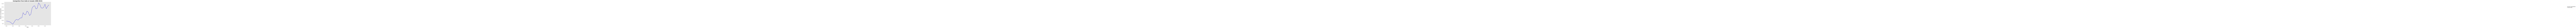

📊 Peak immigration year: 2005 with 36,210 immigrants
📈 Total immigration from India: 691,904


In [36]:
# Single Line Plot: Immigration from India
print("🔍 CREATING LINE PLOTS")
print("=" * 50)

# Extract India's immigration data
india_immigration = df_can.loc['India', years]
print(f"🇮🇳 India immigration data extracted: {len(india_immigration)} years")

# Create a simple line plot
plt.figure(figsize=(12, 6))
india_immigration.plot(kind='line', color='blue', linewidth=2)
plt.title('Immigration from India to Canada (1980-2013)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Immigrants', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Convert index to integer for better plotting
india_immigration.index = india_immigration.index.map(int)

# Add annotation for significant events
plt.text(1990, max(india_immigration)*0.8, 'Economic Liberalization\nin India (1991)', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.show()

print(f"📊 Peak immigration year: {india_immigration.idxmax()} with {india_immigration.max():,} immigrants")
print(f"📈 Total immigration from India: {india_immigration.sum():,}")

In [37]:
df_can.head()


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


🌍 MULTI-LINE COMPARISON


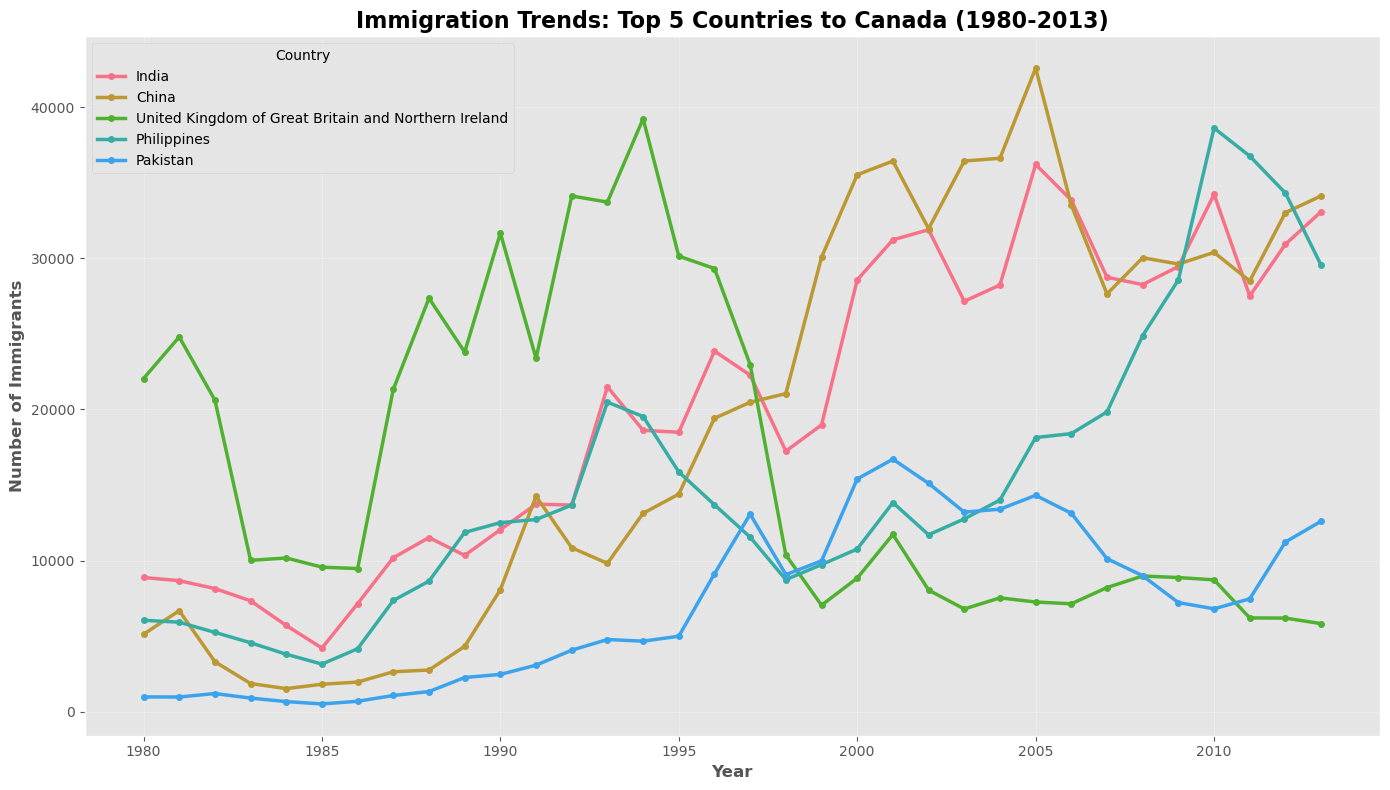


📊 COMPARISON SUMMARY:
🏳️ India          : Total=691,904 | Peak=2005(36,210)
🏳️ China          : Total=659,962 | Peak=2005(42,584)
🏳️ United Kingdom of Great Britain and Northern Ireland: Total=551,500 | Peak=1994(39,231)
🏳️ Philippines    : Total=511,391 | Peak=2010(38,617)
🏳️ Pakistan       : Total=241,600 | Peak=2001(16,708)


In [38]:
# Multi-line Plot: Comparing Multiple Countries
print("🌍 MULTI-LINE COMPARISON")
print("=" * 40)

# Select top immigration countries for comparison
countries = ['India', 'China', 'United Kingdom of Great Britain and Northern Ireland', 'Philippines', 'Pakistan']
df_comparison = df_can.loc[countries, years]

# Create multi-line plot
plt.figure(figsize=(14, 8))
for country in countries:
    country_data = df_comparison.loc[country, years]
    country_data.index = country_data.index.map(int)
    plt.plot(country_data.index, country_data.values, 
             linewidth=2.5, marker='o', markersize=4, label=country)

plt.title('Immigration Trends: Top 5 Countries to Canada (1980-2013)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Immigrants', fontsize=12, fontweight='bold')
plt.legend(title='Country', loc='upper left', frameon=True)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\n📊 COMPARISON SUMMARY:")
for country in countries:
    total = df_comparison.loc[country, years].sum()
    peak_year = df_comparison.loc[country, years].idxmax()
    peak_value = df_comparison.loc[country, years].max()
    print(f"🏳️ {country:15}: Total={total:>6,} | Peak={peak_year}({peak_value:,})")

## 3. Area Plots - Showing Proportional Relationships

**Area plots** are excellent for showing cumulative totals and proportional relationships over time. They're particularly useful for visualizing how different categories contribute to a total.

### When to Use Area Plots:
- **Stacked Data**: When you want to show parts of a whole over time
- **Cumulative Values**: Displaying running totals or cumulative distributions
- **Proportional Analysis**: Understanding relative contributions of different categories

📊 CREATING AREA PLOTS
🏆 Top 5 immigration countries: ['India', 'China', 'United Kingdom of Great Britain and Northern Ireland', 'Philippines', 'Pakistan']


<Figure size 1400x800 with 0 Axes>

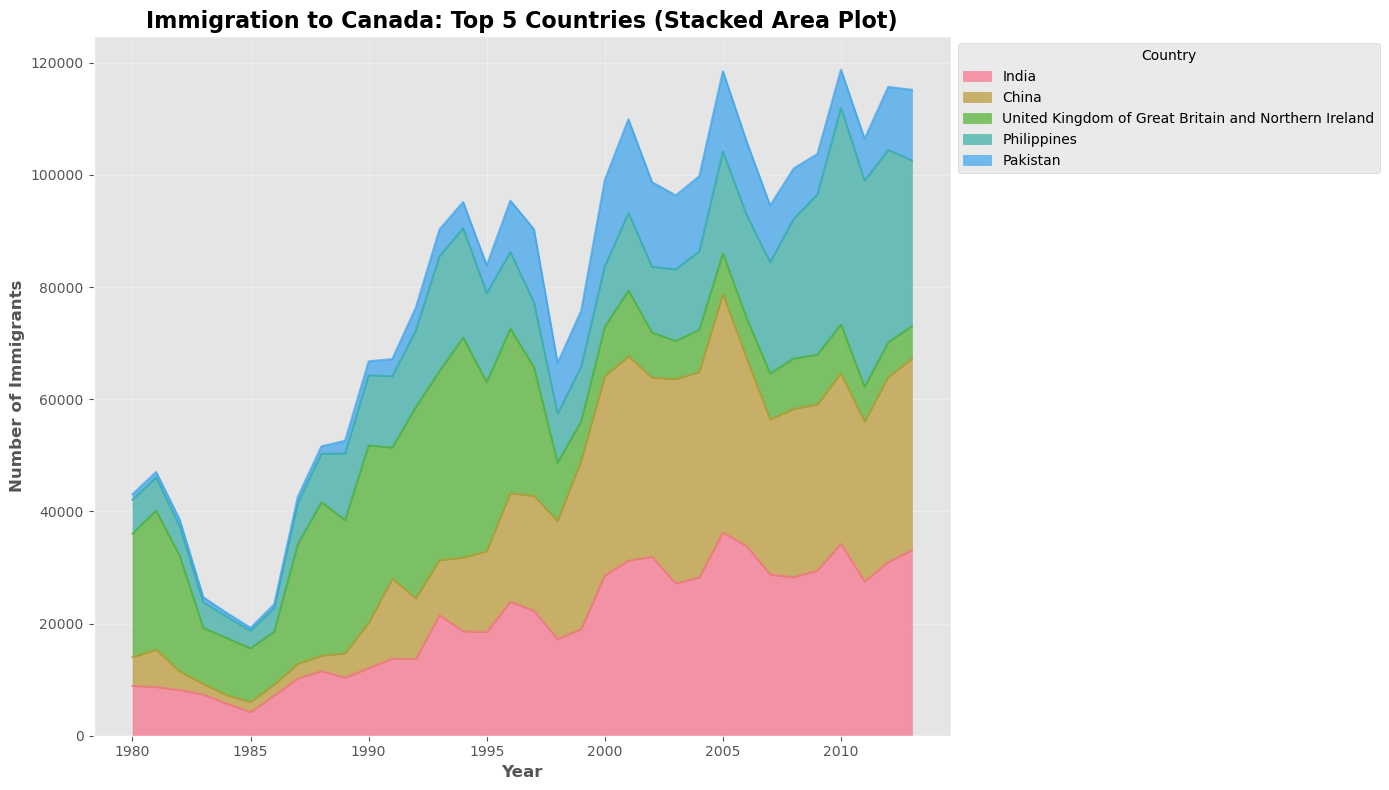


📈 AREA PLOT INSIGHTS:
🥇 Largest contributor: 691,904 immigrants
🏆 Top 5 total immigration: 2,656,357
📊 Represents 41.4% of all immigration


In [39]:
# Area Plot: Top 5 Immigration Countries
print("📊 CREATING AREA PLOTS")
print("=" * 40)

# Get top 5 countries by total immigration
top5_countries = df_can.sort_values('Total', ascending=False).head(5)
top5_names = top5_countries.index.tolist()

print(f"🏆 Top 5 immigration countries: {top5_names}")

# Prepare data for area plot (need to transpose for proper stacking)
area_data = top5_countries[years].transpose()

# Create area plot
plt.figure(figsize=(14, 8))
area_data.plot(kind='area', figsize=(14, 8), alpha=0.7)

plt.title('Immigration to Canada: Top 5 Countries (Stacked Area Plot)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Immigrants', fontsize=12, fontweight='bold')
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print insights
print("\n📈 AREA PLOT INSIGHTS:")
print(f"🥇 Largest contributor: {top5_countries.loc[top5_names[0], 'Total']:,} immigrants")
print(f"🏆 Top 5 total immigration: {top5_countries['Total'].sum():,}")
print(f"📊 Represents {(top5_countries['Total'].sum()/df_can['Total'].sum()*100):.1f}% of all immigration")

## 4. Histograms - Understanding Data Distributions

**Histograms** are fundamental for understanding the distribution of your data. They show the frequency of values within specified ranges (bins) and help identify patterns, outliers, and the overall shape of your data distribution.

### Key Concepts:
- **Frequency Distribution**: How often values occur in different ranges
- **Bin Optimization**: Choosing the right number of bins for clear insights
- **Distribution Shape**: Normal, skewed, bimodal, or uniform distributions
- **Outlier Detection**: Identifying unusual values in your dataset

📊 CREATING HISTOGRAMS
📅 Analyzing 2013 immigration data for 195 countries


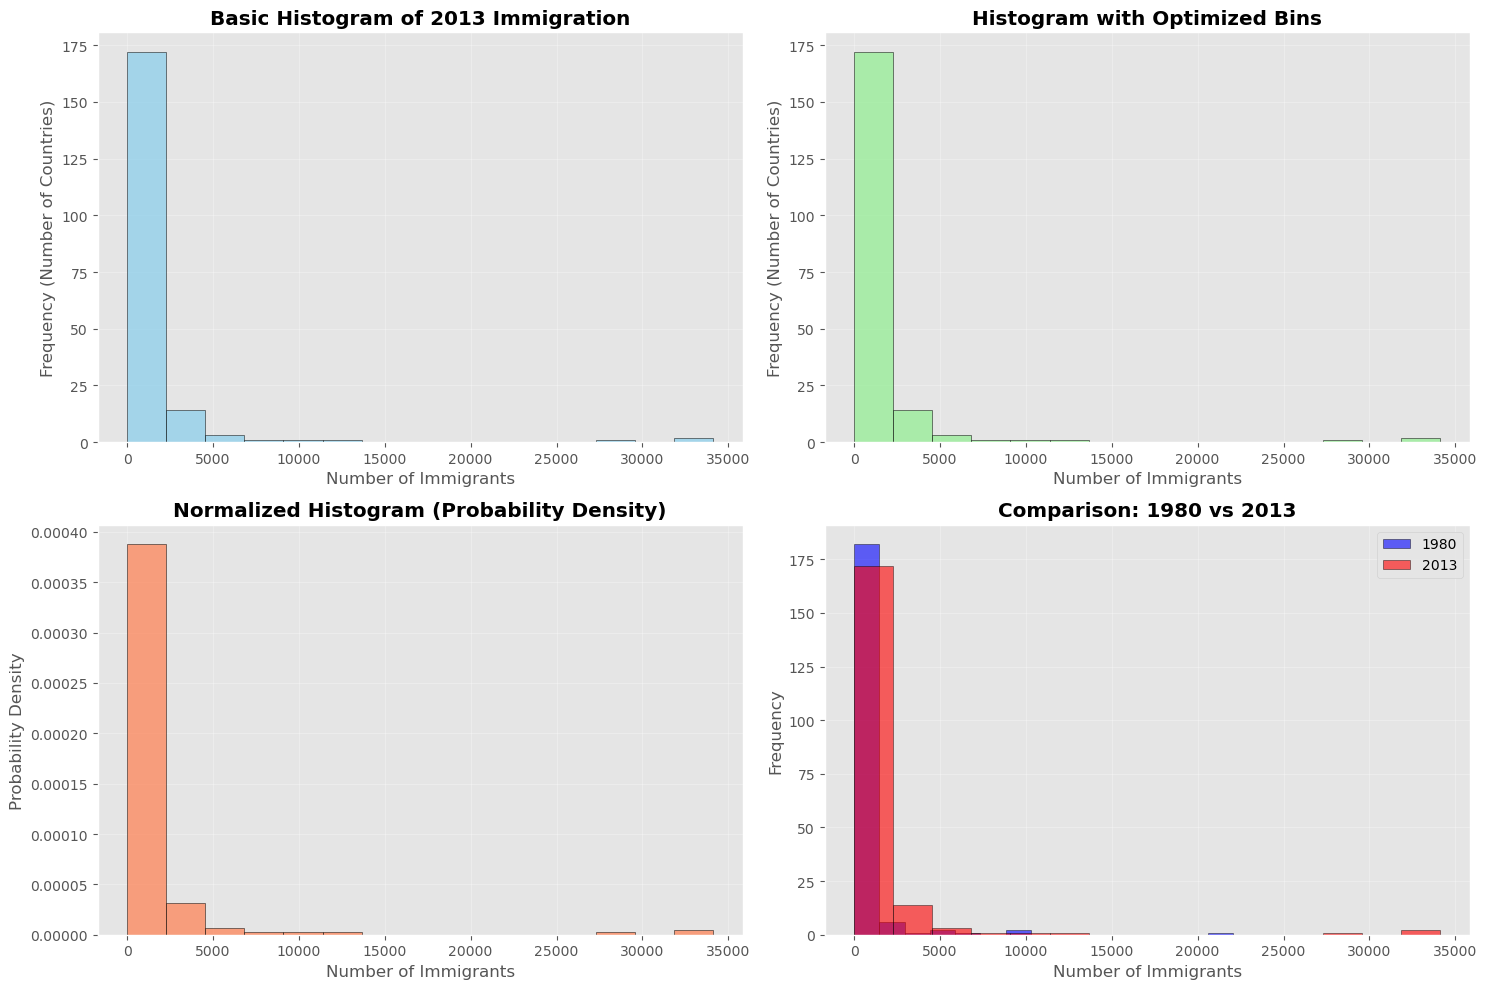


📈 HISTOGRAM ANALYSIS:
📊 2013 Immigration Statistics:
   • Mean: 1320.7
   • Median: 213.0
   • Standard Deviation: 4238.0
   • Range: 0 to 34,129
   • Countries with >10,000 immigrants: 5
   • Countries with <1,000 immigrants: 149


In [40]:
# Histogram: Distribution of Immigration in 2013
print("📊 CREATING HISTOGRAMS")
print("=" * 40)

# Get 2013 immigration data
immigration_2013 = df_can['2013']
print(f"📅 Analyzing 2013 immigration data for {len(immigration_2013)} countries")

# Create figure with subplots for different histogram techniques
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Basic histogram
axes[0, 0].hist(immigration_2013, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Basic Histogram of 2013 Immigration', fontweight='bold')
axes[0, 0].set_xlabel('Number of Immigrants')
axes[0, 0].set_ylabel('Frequency (Number of Countries)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogram with custom bins
count, bin_edges = np.histogram(immigration_2013, bins=15)
axes[0, 1].hist(immigration_2013, bins=bin_edges, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Histogram with Optimized Bins', fontweight='bold')
axes[0, 1].set_xlabel('Number of Immigrants')
axes[0, 1].set_ylabel('Frequency (Number of Countries)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Normalized histogram (probability density)
axes[1, 0].hist(immigration_2013, bins=15, alpha=0.7, density=True, color='coral', edgecolor='black')
axes[1, 0].set_title('Normalized Histogram (Probability Density)', fontweight='bold')
axes[1, 0].set_xlabel('Number of Immigrants')
axes[1, 0].set_ylabel('Probability Density')
axes[1, 0].grid(True, alpha=0.3)

# 4. Multiple histograms comparison (2013 vs 1980)
axes[1, 1].hist(df_can['1980'], bins=15, alpha=0.6, label='1980', color='blue', edgecolor='black')
axes[1, 1].hist(df_can['2013'], bins=15, alpha=0.6, label='2013', color='red', edgecolor='black')
axes[1, 1].set_title('Comparison: 1980 vs 2013', fontweight='bold')
axes[1, 1].set_xlabel('Number of Immigrants')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical analysis
print("\n📈 HISTOGRAM ANALYSIS:")
print(f"📊 2013 Immigration Statistics:")
print(f"   • Mean: {immigration_2013.mean():.1f}")
print(f"   • Median: {immigration_2013.median():.1f}")
print(f"   • Standard Deviation: {immigration_2013.std():.1f}")
print(f"   • Range: {immigration_2013.min()} to {immigration_2013.max():,}")
print(f"   • Countries with >10,000 immigrants: {(immigration_2013 > 10000).sum()}")
print(f"   • Countries with <1,000 immigrants: {(immigration_2013 < 1000).sum()}")

## 5. Bar Charts - Categorical Data Visualization

**Bar charts** are perfect for comparing discrete categories and showing relative magnitudes. They're one of the most effective ways to display categorical data and make comparisons between different groups.

### Types of Bar Charts:
- **Vertical Bar Charts**: Standard comparison format
- **Horizontal Bar Charts**: Better for long category names
- **Grouped Bar Charts**: Comparing multiple series side by side
- **Stacked Bar Charts**: Showing composition within categories

📊 CREATING BAR CHARTS


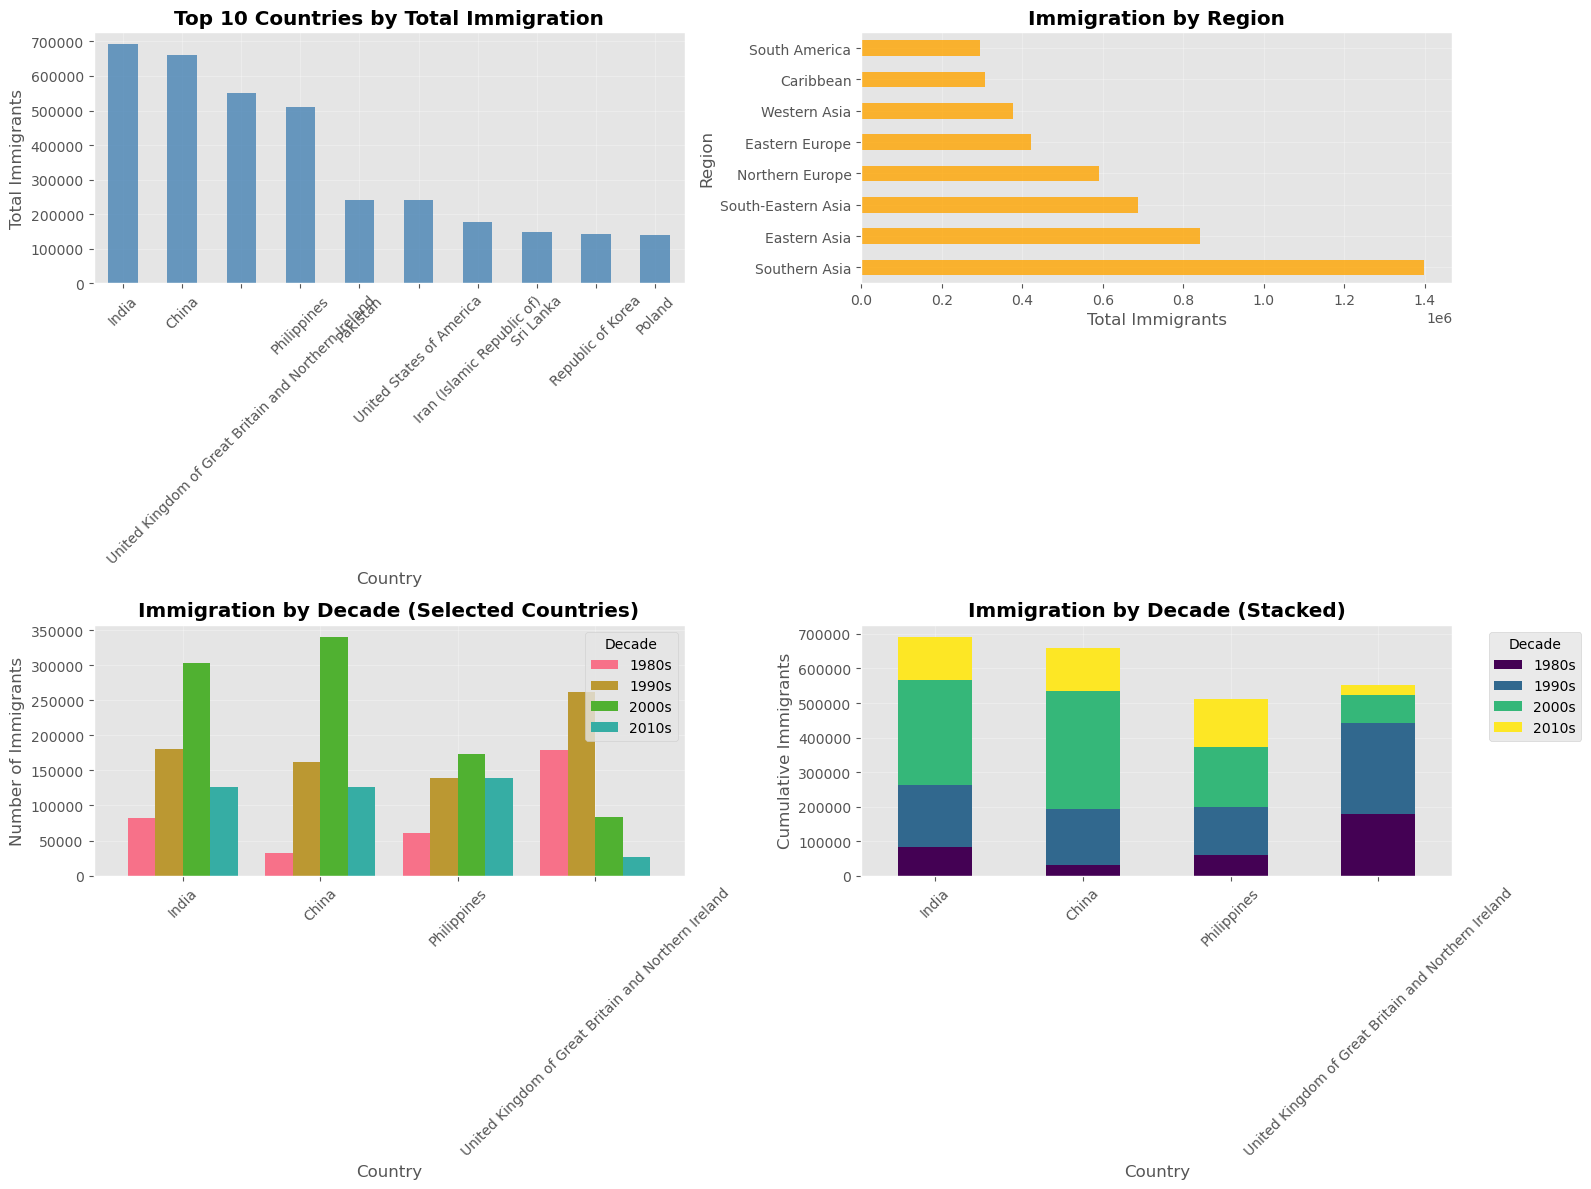


📊 BAR CHART INSIGHTS:
🥇 Top country: India (691,904 immigrants)
🌍 Top region: Southern Asia (1,398,120 immigrants)
📈 Fastest growing decade (India): 2000s
📊 Regional diversity: 22 different regions represented


In [41]:
# Bar Charts: Various Implementations
print("📊 CREATING BAR CHARTS")
print("=" * 40)

# Get data for different types of bar charts
top10_countries = df_can.sort_values('Total', ascending=False).head(10)
regions_data = df_can.groupby('Region')['Total'].sum().sort_values(ascending=False).head(8)

# Create subplots for different bar chart types
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Vertical Bar Chart - Top 10 Countries
top10_countries['Total'].plot(kind='bar', ax=axes[0, 0], color='steelblue', alpha=0.8)
axes[0, 0].set_title('Top 10 Countries by Total Immigration', fontweight='bold')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('Total Immigrants')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. Horizontal Bar Chart - Regions
regions_data.plot(kind='barh', ax=axes[0, 1], color='orange', alpha=0.8)
axes[0, 1].set_title('Immigration by Region', fontweight='bold')
axes[0, 1].set_xlabel('Total Immigrants')
axes[0, 1].set_ylabel('Region')
axes[0, 1].grid(True, alpha=0.3)

# 3. Grouped Bar Chart - Decades comparison
decades_countries = ['India', 'China', 'Philippines', 'United Kingdom of Great Britain and Northern Ireland']
decade_data = pd.DataFrame({
    '1980s': df_can.loc[decades_countries, ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989']].sum(axis=1),
    '1990s': df_can.loc[decades_countries, ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999']].sum(axis=1),
    '2000s': df_can.loc[decades_countries, ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']].sum(axis=1),
    '2010s': df_can.loc[decades_countries, ['2010', '2011', '2012', '2013']].sum(axis=1)
})

decade_data.plot(kind='bar', ax=axes[1, 0], width=0.8)
axes[1, 0].set_title('Immigration by Decade (Selected Countries)', fontweight='bold')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Number of Immigrants')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Decade')
axes[1, 0].grid(True, alpha=0.3)

# 4. Stacked Bar Chart
decade_data.plot(kind='bar', stacked=True, ax=axes[1, 1], colormap='viridis')
axes[1, 1].set_title('Immigration by Decade (Stacked)', fontweight='bold')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Cumulative Immigrants')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Decade', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analysis insights
print("\n📊 BAR CHART INSIGHTS:")
print(f"🥇 Top country: {top10_countries.index[0]} ({top10_countries.iloc[0]['Total']:,} immigrants)")
print(f"🌍 Top region: {regions_data.index[0]} ({regions_data.iloc[0]:,} immigrants)")
print(f"📈 Fastest growing decade (India): {decade_data.loc['India'].idxmax()}")
print(f"📊 Regional diversity: {len(df_can['Region'].unique())} different regions represented")

## 6. Pie Charts - Proportional Data Visualization

Pie charts are effective for showing the composition of a whole where parts are represented as slices. They're particularly useful for:
- **Proportional Analysis**: Understanding relative sizes of categories
- **Composition Visualization**: Showing how parts make up a whole
- **Quick Comparison**: Identifying dominant categories at a glance
- **Percentage Representation**: Displaying data as percentages of total

**Key Features:**
- Circular representation with slices proportional to values
- Best for 6 or fewer categories to maintain readability
- Can include exploded slices for emphasis
- Color coding for category distinction

**Best Practices:**
- Start largest slice at 12 o'clock position
- Use contrasting colors for clear distinction
- Include percentages or values in labels
- Consider donut charts for modern appearance

🥧 CREATING PIE CHARTS


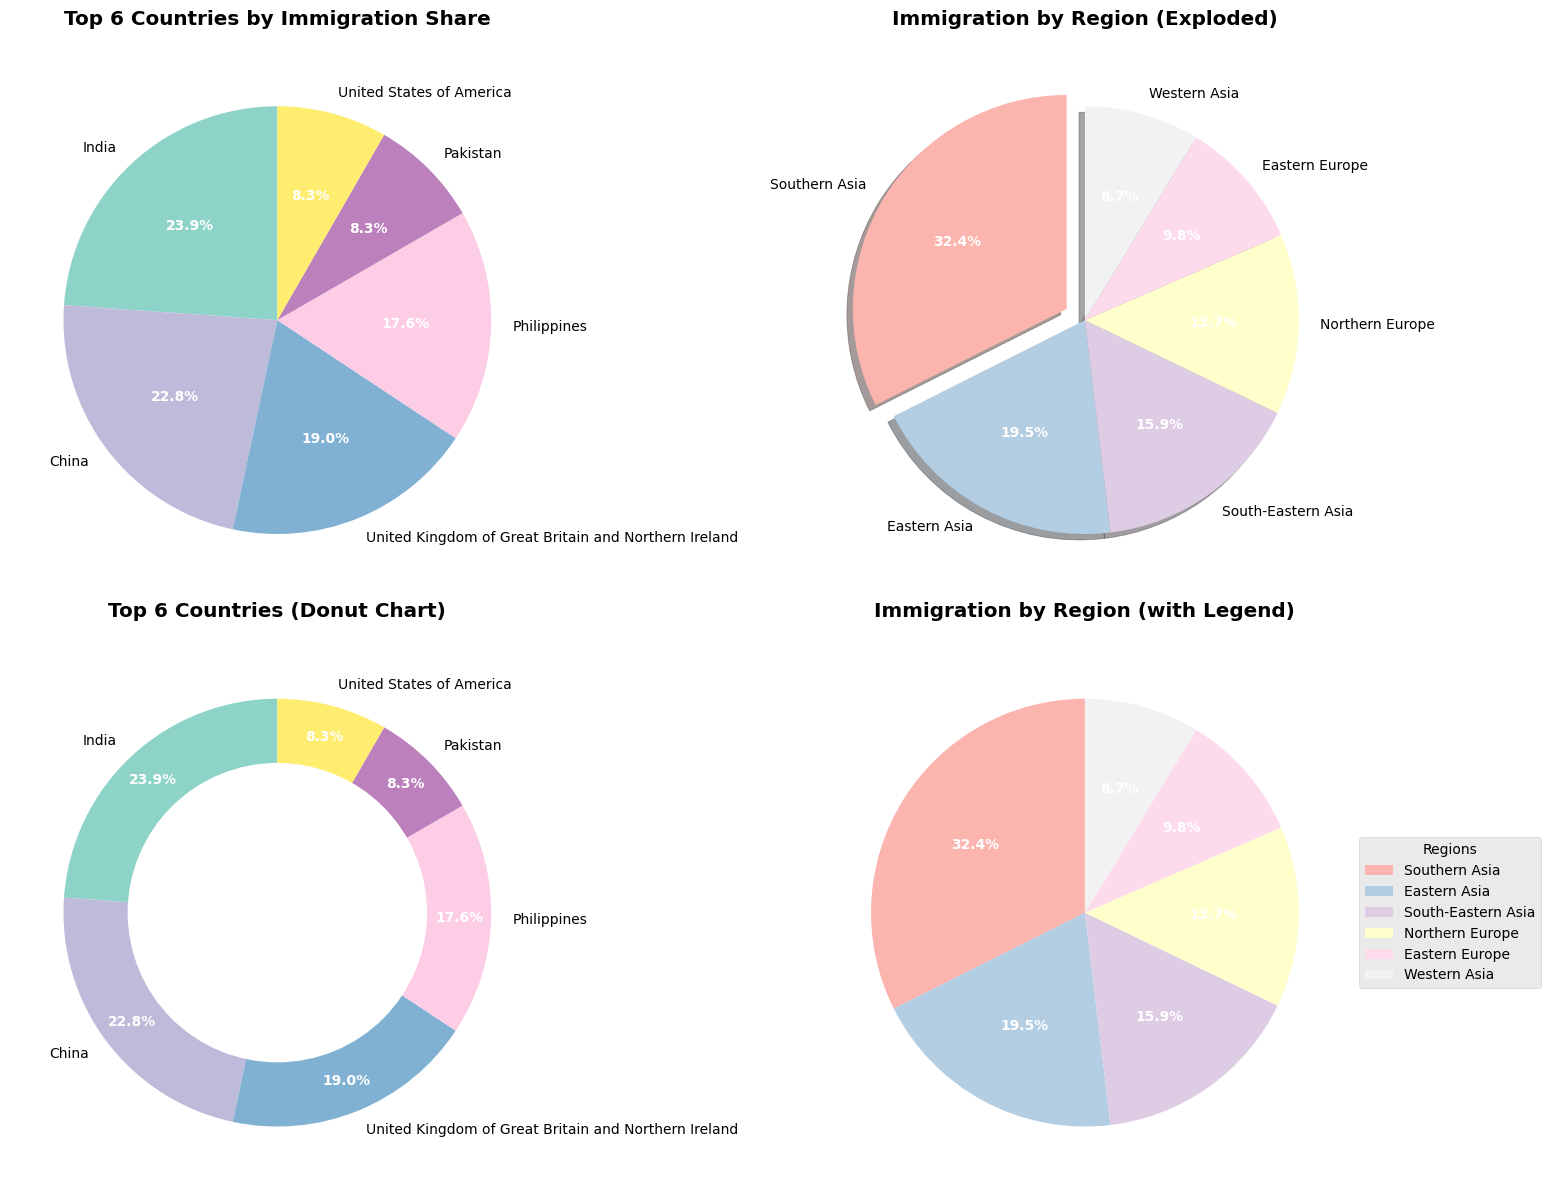


🥧 PIE CHART INSIGHTS:
🥇 Leading country: India (10.8% of total)
🌍 Dominant region: Southern Asia (21.8% of total)
📊 Top 6 countries represent: 45.2% of all immigration
🌐 Regional concentration: Top 6 regions = 67.3% of immigration


In [42]:
# Pie Charts: Proportional Data Visualization
print("🥧 CREATING PIE CHARTS")
print("=" * 40)

# Prepare data for pie charts
top6_countries = df_can.sort_values('Total', ascending=False).head(6)['Total']
regions_pie = df_can.groupby('Region')['Total'].sum().sort_values(ascending=False).head(6)

# Create subplots for different pie chart styles
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Basic Pie Chart - Top 6 Countries
colors1 = plt.cm.Set3(np.linspace(0, 1, len(top6_countries)))
wedges1, texts1, autotexts1 = axes[0, 0].pie(top6_countries.values, 
                                           labels=top6_countries.index,
                                           autopct='%1.1f%%',
                                           colors=colors1,
                                           startangle=90)
axes[0, 0].set_title('Top 6 Countries by Immigration Share', fontweight='bold', pad=20)

# 2. Exploded Pie Chart - Regions
colors2 = plt.cm.Pastel1(np.linspace(0, 1, len(regions_pie)))
explode = (0.1, 0, 0, 0, 0, 0)  # explode the largest slice
wedges2, texts2, autotexts2 = axes[0, 1].pie(regions_pie.values,
                                            labels=regions_pie.index,
                                            autopct='%1.1f%%',
                                            colors=colors2,
                                            explode=explode,
                                            startangle=90,
                                            shadow=True)
axes[0, 1].set_title('Immigration by Region (Exploded)', fontweight='bold', pad=20)

# 3. Donut Chart - Countries
center_circle = plt.Circle((0,0), 0.70, fc='white')
wedges3, texts3, autotexts3 = axes[1, 0].pie(top6_countries.values,
                                            labels=top6_countries.index,
                                            autopct='%1.1f%%',
                                            colors=colors1,
                                            startangle=90,
                                            pctdistance=0.85)
axes[1, 0].add_patch(center_circle)
axes[1, 0].set_title('Top 6 Countries (Donut Chart)', fontweight='bold', pad=20)

# 4. Advanced Pie Chart with legend
wedges4, texts4, autotexts4 = axes[1, 1].pie(regions_pie.values,
                                            autopct='%1.1f%%',
                                            colors=colors2,
                                            startangle=90,
                                            textprops={'fontsize': 10})
axes[1, 1].legend(wedges4, regions_pie.index,
                 title="Regions",
                 loc="center left",
                 bbox_to_anchor=(1, 0, 0.5, 1))
axes[1, 1].set_title('Immigration by Region (with Legend)', fontweight='bold', pad=20)

# Improve text readability
for autotext in autotexts1 + autotexts2 + autotexts3 + autotexts4:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Analysis insights
print("\n🥧 PIE CHART INSIGHTS:")
print(f"🥇 Leading country: {top6_countries.index[0]} ({top6_countries.iloc[0]/df_can['Total'].sum()*100:.1f}% of total)")
print(f"🌍 Dominant region: {regions_pie.index[0]} ({regions_pie.iloc[0]/df_can['Total'].sum()*100:.1f}% of total)")
print(f"📊 Top 6 countries represent: {top6_countries.sum()/df_can['Total'].sum()*100:.1f}% of all immigration")
print(f"🌐 Regional concentration: Top 6 regions = {regions_pie.sum()/df_can['Total'].sum()*100:.1f}% of immigration")

## 7. Scatter Plots & Box Plots - Relationship and Distribution Analysis

### Scatter Plots
Scatter plots reveal relationships between two continuous variables and are essential for:
- **Correlation Analysis**: Identifying positive, negative, or no correlation
- **Trend Detection**: Spotting linear or non-linear patterns
- **Outlier Identification**: Finding data points that deviate from patterns
- **Clustering Visualization**: Identifying groups within data

### Box Plots (Box-and-Whisker Plots)
Box plots provide comprehensive distribution summaries showing:
- **Quartiles**: Q1, Median (Q2), Q3 represented as box boundaries
- **Outliers**: Points beyond whiskers (1.5×IQR from quartiles)
- **Distribution Shape**: Symmetry, skewness, and spread
- **Comparative Analysis**: Side-by-side comparison of multiple groups

**Key Components:**
- Box: Interquartile Range (IQR) from Q1 to Q3
- Line in box: Median value
- Whiskers: Extend to furthest non-outlier points
- Dots: Individual outlier values

📈 CREATING SCATTER PLOTS & BOX PLOTS


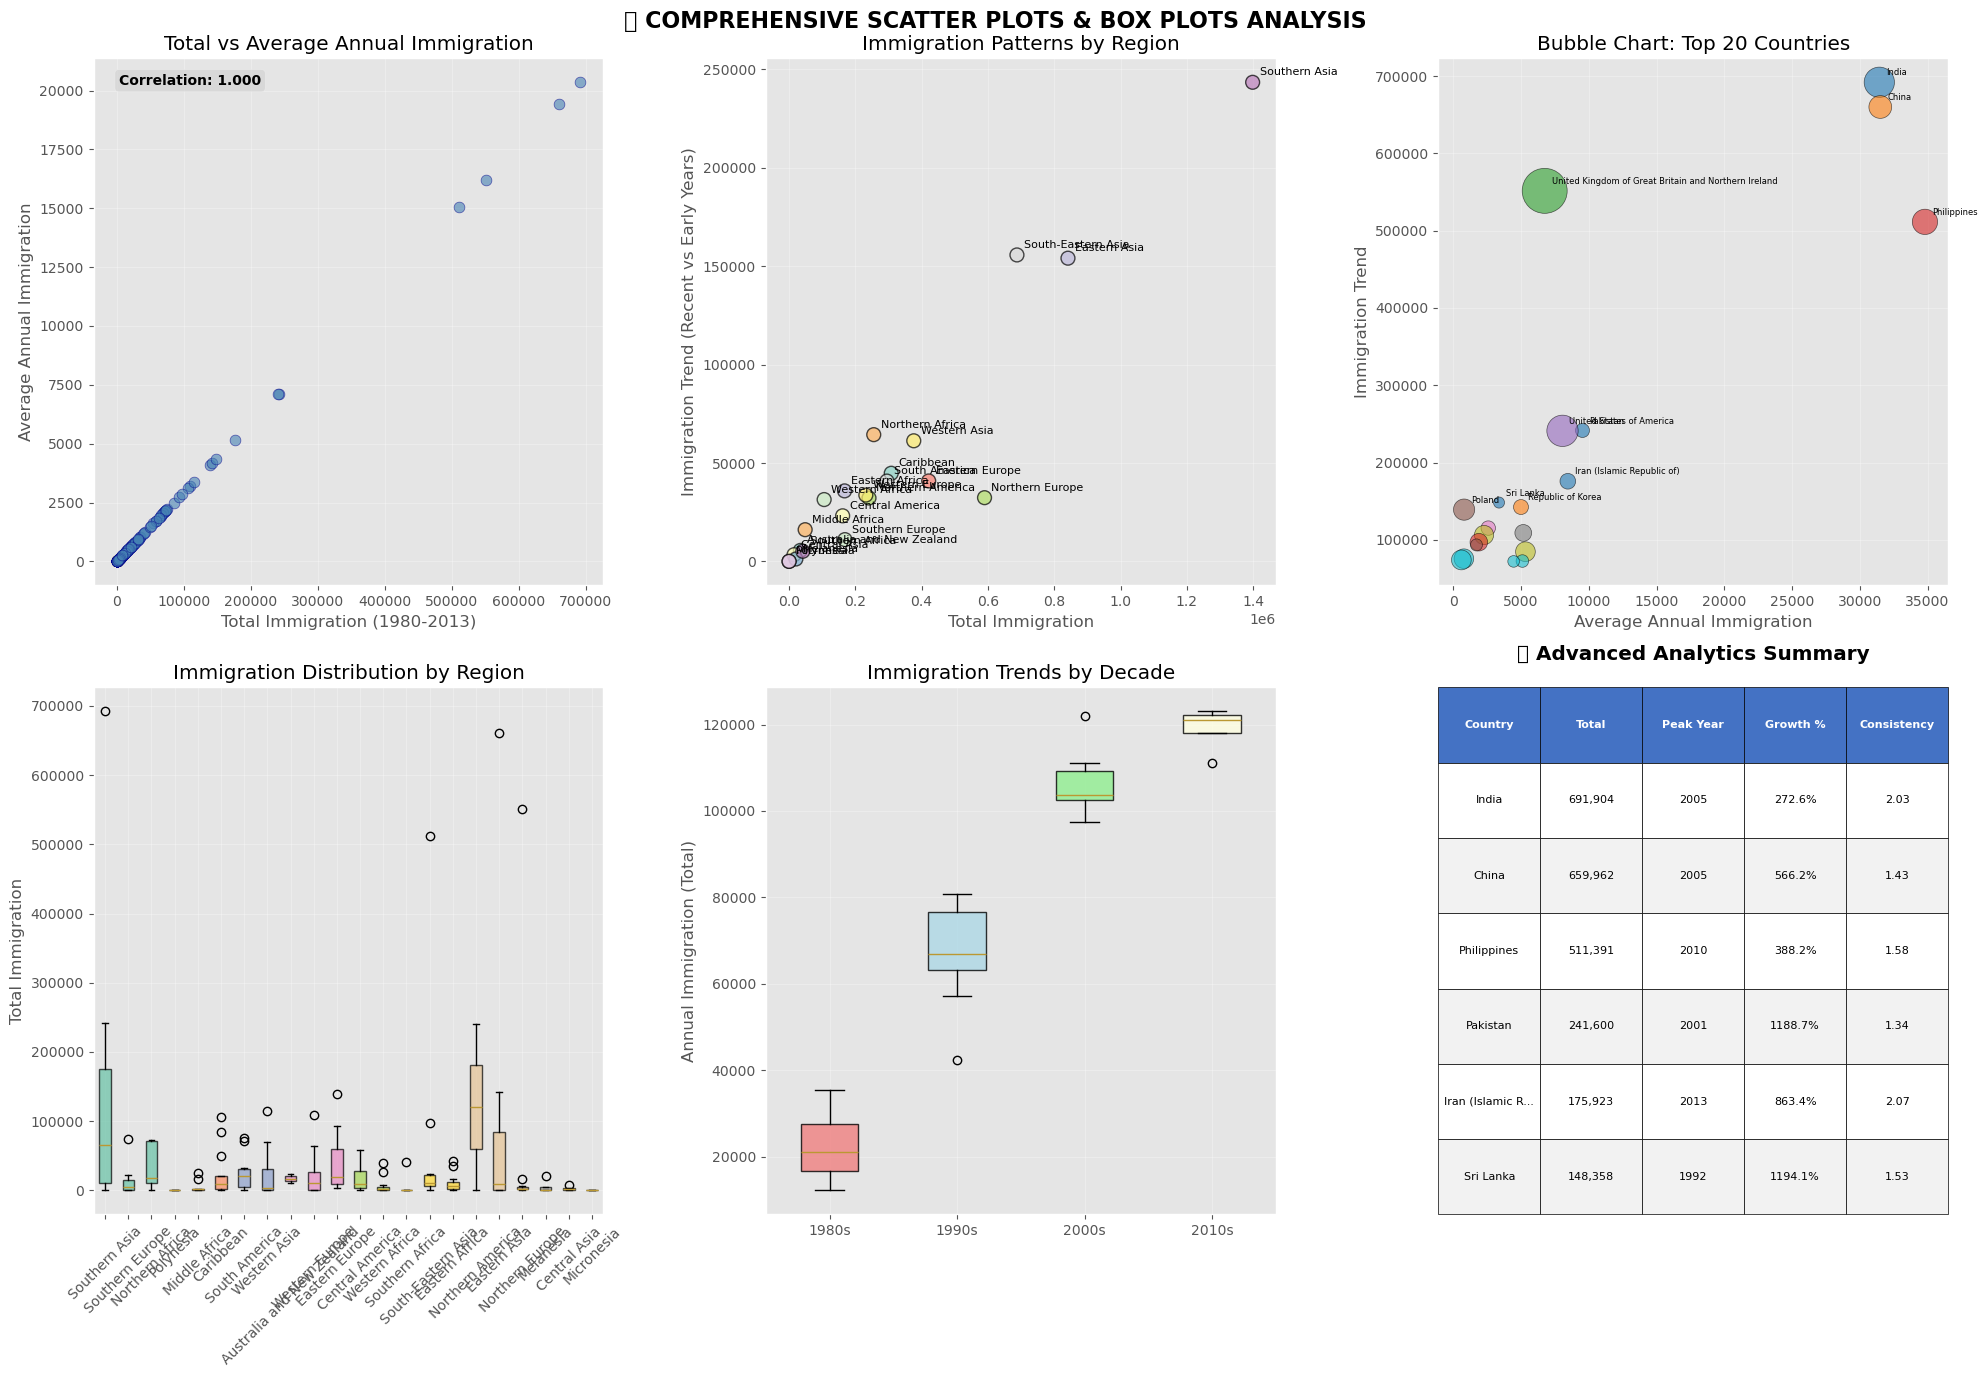

✅ Scatter plots and box plots analysis completed!
📊 Key insights:
   • Correlation between total and average immigration: 1.000
   • Top immigration region: Southern Asia
   • Most consistent country: Iran (Islamic Republic of)


In [45]:
print("📈 CREATING SCATTER PLOTS & BOX PLOTS")
print("=" * 50)

# Select specific countries for comparison
selected_countries = ['India', 'China', 'Philippines', 'Pakistan', 'Sri Lanka', 'Iran (Islamic Republic of)']

# Define decades for analysis
decades = {
    '1980s': ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989'],
    '1990s': ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999'],
    '2000s': ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009'],
    '2010s': ['2010', '2011', '2012', '2013']
}

# Prepare data for box plots by decade
decade_data = []
decade_labels = []
for decade, years_list in decades.items():
    decade_values = df_can.loc[selected_countries, years_list].sum(axis=0).values
    decade_data.append(decade_values)
    decade_labels.append(decade)

# Create a comprehensive subplot with multiple visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
fig.suptitle('🎯 COMPREHENSIVE SCATTER PLOTS & BOX PLOTS ANALYSIS', fontsize=16, fontweight='bold', y=0.98)

# 1. Total vs Average Annual Immigration (Scatter Plot)
ax1 = axes[0, 0]
total_immigration = df_can['Total']
average_immigration = df_can[years].mean(axis=1)

# Calculate correlation
correlation = np.corrcoef(total_immigration, average_immigration)[0, 1]

# Create scatter plot
scatter1 = ax1.scatter(total_immigration, average_immigration, 
                      alpha=0.6, s=60, c='steelblue', edgecolors='darkblue', linewidth=0.5)

# Add correlation text
ax1.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=ax1.transAxes, fontsize=10, fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgray', alpha=0.7))

ax1.set_xlabel('Total Immigration (1980-2013)')
ax1.set_ylabel('Average Annual Immigration')
ax1.set_title('Total vs Average Annual Immigration')
ax1.grid(True, alpha=0.3)

# 2. Immigration Patterns by Region (Scatter Plot with trend analysis)
ax2 = axes[0, 1]
regions_data = df_can.groupby('Region')['Total'].sum()
recent_trend = df_can.groupby('Region')[['2010', '2011', '2012', '2013']].sum().sum(axis=1)

colors = plt.cm.Set3(np.linspace(0, 1, len(regions_data)))
scatter2 = ax2.scatter(regions_data.values, recent_trend.values, 
                      s=100, c=colors, alpha=0.7, edgecolors='black', linewidth=1)

# Add region labels
for i, (region, total) in enumerate(regions_data.items()):
    ax2.annotate(region, (total, recent_trend.iloc[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)

ax2.set_xlabel('Total Immigration')
ax2.set_ylabel('Immigration Trend (Recent vs Early Years)')
ax2.set_title('Immigration Patterns by Region')
ax2.grid(True, alpha=0.3)

# 3. Bubble Chart: Top 20 Countries
ax3 = axes[0, 2]
top20_countries = df_can.nlargest(20, 'Total')

bubble_data = pd.DataFrame({
    'Total_Immigration': top20_countries['Total'],
    'Recent_Avg': top20_countries[['2010', '2011', '2012', '2013']].mean(axis=1),
    'Historical_Avg': top20_countries[['1980', '1981', '1982', '1983']].mean(axis=1),
    'Region': top20_countries['Region']
})

# Create color map for regions
region_colors = {region: plt.cm.tab10(i) for i, region in enumerate(bubble_data['Region'].unique())}
colors = [region_colors[region] for region in bubble_data['Region']]

# Bubble sizes based on historical average (normalized)
bubble_sizes = (bubble_data['Historical_Avg'] / bubble_data['Historical_Avg'].max() * 1000) + 50

scatter3 = ax3.scatter(bubble_data['Recent_Avg'], bubble_data['Total_Immigration'], 
                      s=bubble_sizes, c=colors, alpha=0.6, edgecolors='black', linewidth=0.5)

# Add country labels for the largest bubbles
for i, country in enumerate(top20_countries.index[:10]):  # Label top 10
    ax3.annotate(country, (bubble_data['Recent_Avg'].iloc[i], bubble_data['Total_Immigration'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=6)

ax3.set_xlabel('Average Annual Immigration')
ax3.set_ylabel('Immigration Trend')
ax3.set_title('Bubble Chart: Top 20 Countries')
ax3.grid(True, alpha=0.3)

# 4. Immigration Distribution by Region (Box Plot)
ax4 = axes[1, 0]
region_data_list = []
regions = []

for region in df_can['Region'].unique():
    region_data = df_can[df_can['Region'] == region]['Total']
    region_data_list.append(region_data)
    regions.append(region)

box_plot = ax4.boxplot(region_data_list, labels=regions, patch_artist=True)

# Customize box plot colors
colors_box = plt.cm.Set2(np.linspace(0, 1, len(regions)))
for patch, color in zip(box_plot['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax4.set_ylabel('Total Immigration')
ax4.set_title('Immigration Distribution by Region')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

# 5. Box Plot by Decades
ax5 = axes[1, 1]
box_plot_decades = ax5.boxplot(decade_data, labels=decade_labels, patch_artist=True)

# Color the boxes
decade_colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow']
for patch, color in zip(box_plot_decades['boxes'], decade_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)

ax5.set_ylabel('Annual Immigration (Total)')
ax5.set_title('Immigration Trends by Decade')
ax5.grid(True, alpha=0.3)

# 6. Advanced Analytics Table (Text-based visualization)
ax6 = axes[1, 2]
ax6.axis('off')

# Prepare analytics data for selected countries
selected_countries = ['India', 'China', 'Philippines', 'Pakistan', 'Iran (Islamic Republic of)', 'Sri Lanka']

analytics_data = pd.DataFrame({
    'Country': selected_countries,
    'Total': df_can.loc[selected_countries, 'Total'],
    'Peak_Year': df_can.loc[selected_countries, years].idxmax(axis=1).astype(int),
    'Growth_Rate': ((df_can.loc[selected_countries, '2013'] - 
                    df_can.loc[selected_countries, '1980']) / 
                   df_can.loc[selected_countries, '1980'] * 100),
    'Consistency': 1 / (df_can.loc[selected_countries, years].std(axis=1) / 
                        df_can.loc[selected_countries, years].mean(axis=1))
})

# Create table
table_data = []
for i, row in analytics_data.iterrows():
    table_data.append([
        row['Country'][:15] + '...' if len(row['Country']) > 15 else row['Country'],
        f"{row['Total']:,.0f}",
        str(row['Peak_Year']),
        f"{row['Growth_Rate']:.1f}%",
        f"{row['Consistency']:.2f}"
    ])

table = ax6.table(cellText=table_data,
                 colLabels=['Country', 'Total', 'Peak Year', 'Growth %', 'Consistency'],
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 2)

# Style the table
for i in range(len(table_data) + 1):
    for j in range(5):
        cell = table[(i, j)]
        if i == 0:  # Header row
            cell.set_facecolor('#4472C4')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor('#F2F2F2' if i % 2 == 0 else 'white')

ax6.set_title('📊 Advanced Analytics Summary', fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("✅ Scatter plots and box plots analysis completed!")
print("📊 Key insights:")
print(f"   • Correlation between total and average immigration: {correlation:.3f}")
print(f"   • Top immigration region: {regions_data.idxmax()}")
print(f"   • Most consistent country: {analytics_data.loc[analytics_data['Consistency'].idxmax(), 'Country']}")

## 8. Specialized Visualizations - Waffle Charts & Word Clouds

### Waffle Charts
Waffle charts provide an intuitive alternative to pie charts, using a grid of squares where each square represents a unit of data. They excel at:
- **Proportional Representation**: Easy to understand percentages
- **Visual Impact**: More engaging than traditional pie charts
- **Accuracy**: Better for precise percentage reading
- **Comparison**: Side-by-side analysis of multiple datasets

### Word Clouds
Word clouds visualize text data by displaying words with sizes proportional to their frequency or importance:
- **Text Analysis**: Quick identification of key themes
- **Frequency Visualization**: Prominent words appear larger
- **Aesthetic Appeal**: Visually engaging text representation
- **Pattern Recognition**: Identifying dominant topics in text data

**Applications:**
- Survey responses analysis
- Social media sentiment
- Document summarization
- Brand keyword analysis

🧇 CREATING SPECIALIZED VISUALIZATIONS
⚠️ Note: pywaffle not installed. Showing alternative implementation.
⚠️ Note: wordcloud not installed. Showing alternative implementation.
⚠️ Note: pywaffle and/or wordcloud not installed. Showing alternative implementations.


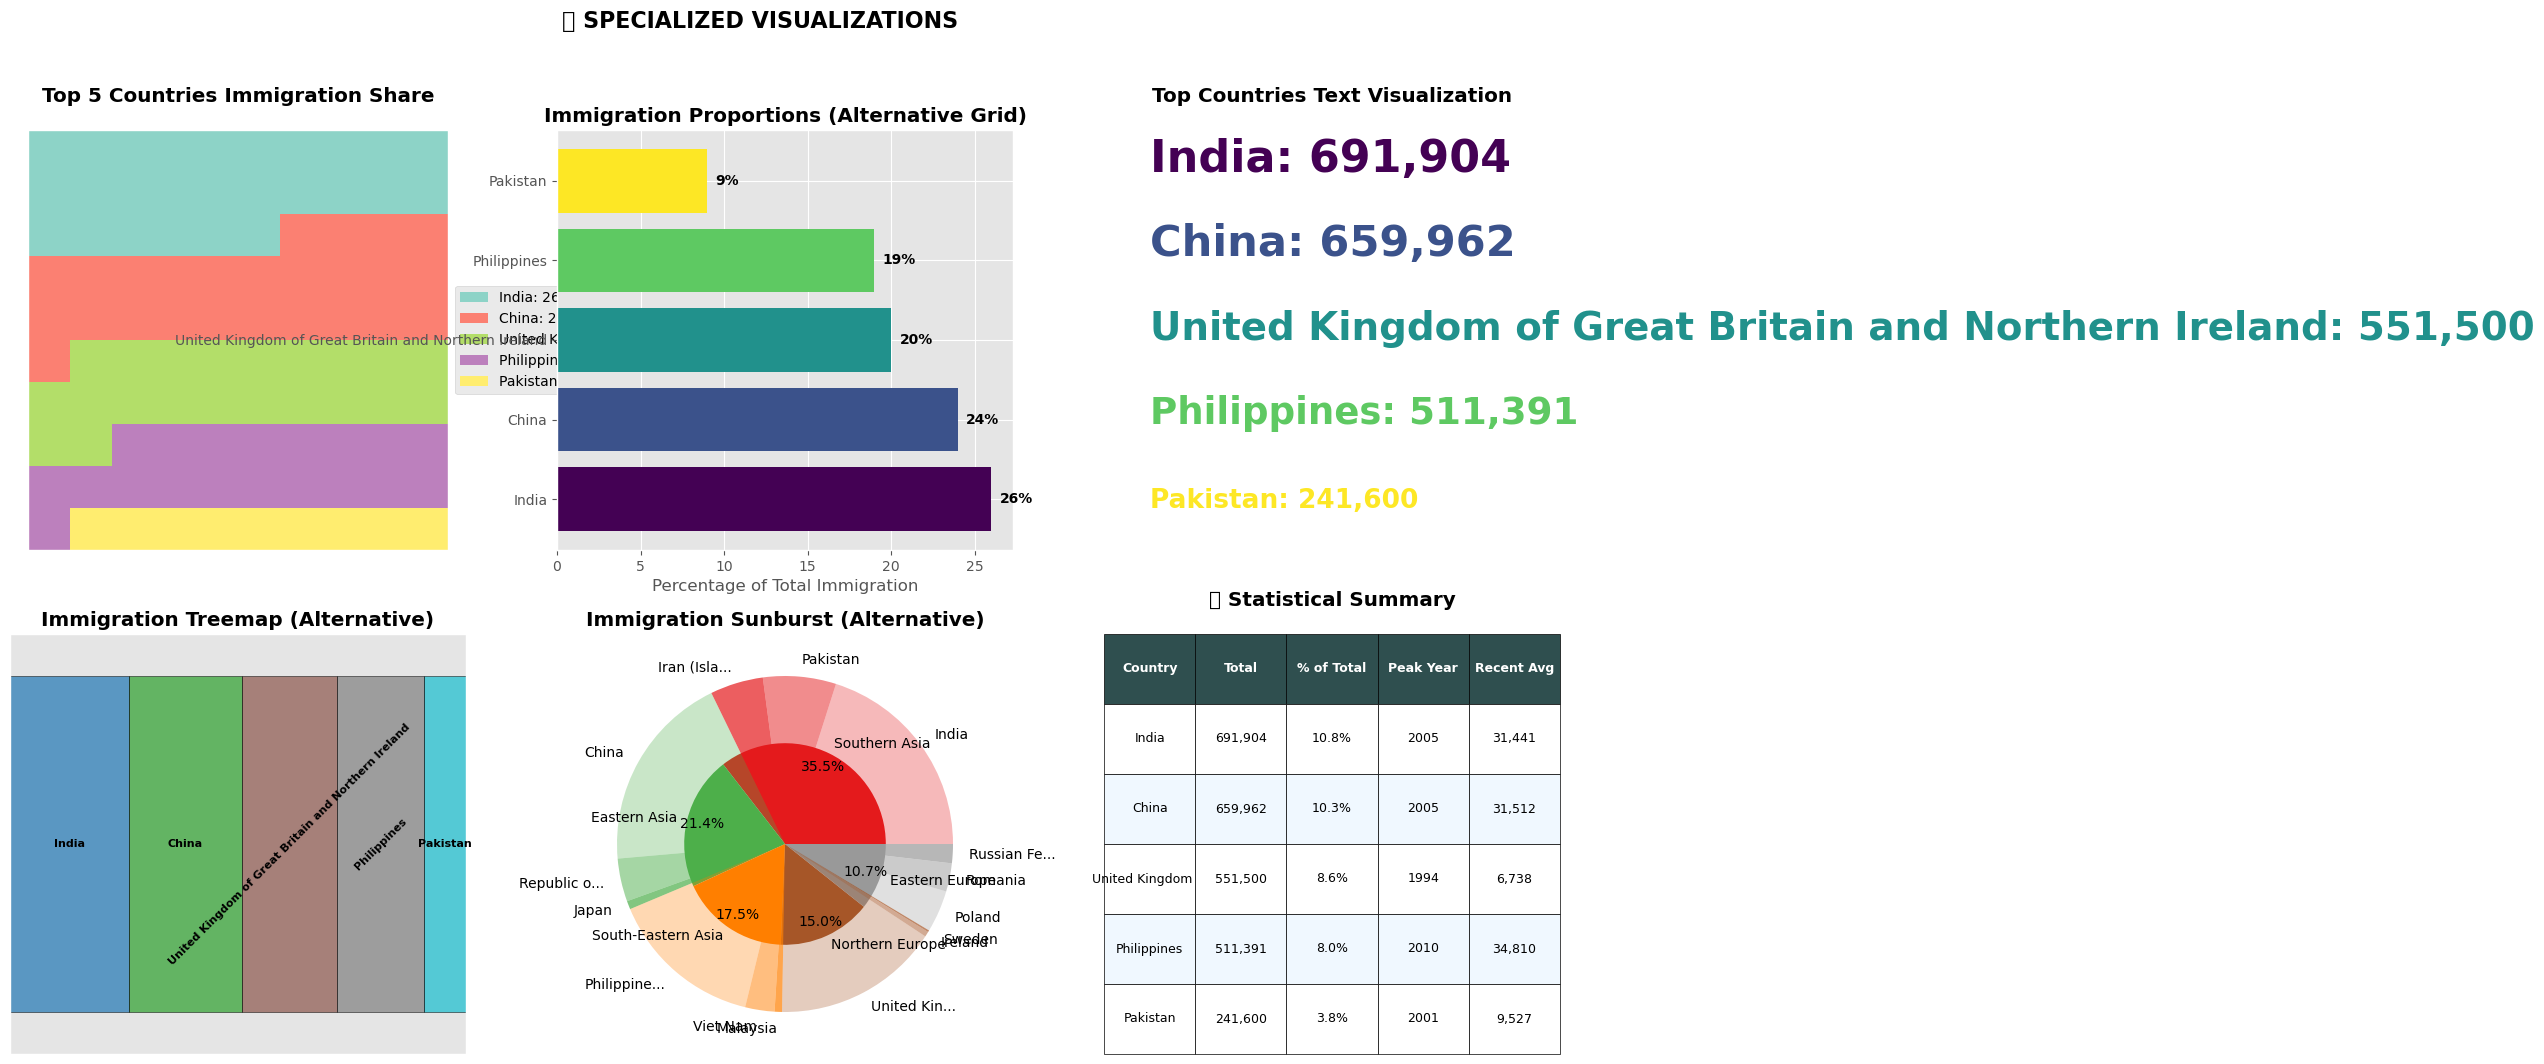

✅ Specialized visualizations completed!
📊 Libraries status:
   • PyWaffle: ❌ Not installed (using alternative)
   • WordCloud: ❌ Not installed (using alternative)
📈 Top immigration countries: India, China, United Kingdom of Great Britain and Northern Ireland


In [47]:
print("🧇 CREATING SPECIALIZED VISUALIZATIONS")
print("=" * 50)

# Check if specialized libraries are available
try:
    from pywaffle import Waffle
    waffle_available = True
except ImportError:
    waffle_available = False
    print("⚠️ Note: pywaffle not installed. Showing alternative implementation.")

try:
    from wordcloud import WordCloud
    wordcloud_available = True
except ImportError:
    wordcloud_available = False
    print("⚠️ Note: wordcloud not installed. Showing alternative implementation.")

if not waffle_available or not wordcloud_available:
    print("⚠️ Note: pywaffle and/or wordcloud not installed. Showing alternative implementations.")

# Manual waffle chart implementation
def create_manual_waffle(data, title, ax, colors=None):
    """Create a manual waffle chart when pywaffle is not available"""
    # Ensure we're working with numeric data only
    if isinstance(data, pd.DataFrame):
        # Extract the 'Total' column if it's a DataFrame
        if 'Total' in data.columns:
            data = data['Total']
        else:
            # If no 'Total' column, take the first numeric column
            numeric_cols = data.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) > 0:
                data = data[numeric_cols[0]]
            else:
                raise ValueError("No numeric data found for waffle chart")
    
    # Convert to percentages and round
    total = data.sum()
    percentages = (data / total * 100).round().astype(int)
    
    # Create 10x10 grid (100 squares)
    grid_size = 10
    squares = np.zeros((grid_size, grid_size))
    
    # Default colors if none provided
    if colors is None:
        colors = plt.cm.Set3(np.linspace(0, 1, len(data)))
    
    # Fill squares
    current_square = 0
    for i, (country, percentage) in enumerate(percentages.items()):
        for _ in range(int(percentage)):
            if current_square < 100:
                row = current_square // grid_size
                col = current_square % grid_size
                squares[row, col] = i + 1
                current_square += 1
    
    # Create the plot
    im = ax.imshow(squares, cmap='Set3', aspect='equal')
    ax.set_title(title, fontweight='bold', pad=20)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add legend
    legend_elements = [plt.Rectangle((0,0),1,1, facecolor=colors[i], 
                                   label=f'{country}: {percentages[country]}%') 
                      for i, country in enumerate(data.index)]
    ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

# Get top 5 countries
top5_countries = df_can.sort_values('Total', ascending=False).head(5)

# Create subplots
fig = plt.figure(figsize=(20, 12))
fig.suptitle('🎨 SPECIALIZED VISUALIZATIONS', fontsize=16, fontweight='bold', y=0.98)

# 1. Waffle Chart
ax1 = plt.subplot(2, 3, 1)

if waffle_available:
    # Use actual pywaffle if available
    waffle_data = top5_countries['Total'].to_dict()
    ax1 = fig.add_subplot(2, 3, 1, FigureClass=Waffle, 
                         rows=10, values=waffle_data, 
                         title={'label': 'Top 5 Countries Immigration Share', 'fontweight': 'bold'},
                         legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)})
else:
    # Manual implementation
    create_manual_waffle(top5_countries, 'Top 5 Countries Immigration Share', ax1)

# 2. Alternative Grid Visualization
ax2 = plt.subplot(2, 3, 2)

# Create a proportional grid based on total immigration
grid_data = top5_countries['Total'].values
grid_normalized = (grid_data / grid_data.sum() * 100).astype(int)

# Create color-coded bars
colors = plt.cm.viridis(np.linspace(0, 1, len(top5_countries)))
bars = ax2.barh(range(len(top5_countries)), grid_normalized, color=colors)

# Customize
ax2.set_yticks(range(len(top5_countries)))
ax2.set_yticklabels(top5_countries.index)
ax2.set_xlabel('Percentage of Total Immigration')
ax2.set_title('Immigration Proportions (Alternative Grid)', fontweight='bold')

# Add percentage labels
for i, (bar, percentage) in enumerate(zip(bars, grid_normalized)):
    ax2.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{percentage}%', va='center', fontweight='bold')

# 3. Word Cloud Alternative (if wordcloud not available)
ax3 = plt.subplot(2, 3, 3)

if wordcloud_available:
    # Create word cloud from country names weighted by immigration
    wordcloud_dict = top5_countries['Total'].to_dict()
    wordcloud = WordCloud(width=400, height=300, background_color='white',
                         colormap='viridis', max_words=50).generate_from_frequencies(wordcloud_dict)
    ax3.imshow(wordcloud, interpolation='bilinear')
    ax3.set_title('Immigration Word Cloud', fontweight='bold')
    ax3.axis('off')
else:
    # Alternative text-based visualization
    ax3.axis('off')
    ax3.set_title('Top Countries Text Visualization', fontweight='bold', pad=20)
    
    # Create text visualization
    y_positions = np.linspace(0.9, 0.1, len(top5_countries))
    max_immigration = top5_countries['Total'].max()
    
    for i, (country, row) in enumerate(top5_countries.iterrows()):
        # Font size proportional to immigration numbers
        font_size = 12 + (row['Total'] / max_immigration) * 20
        color = colors[i]
        
        ax3.text(0.1, y_positions[i], f"{country}: {row['Total']:,}", 
                fontsize=font_size, color=color, fontweight='bold',
                transform=ax3.transAxes)

# 4. Treemap Alternative (using nested rectangles)
ax4 = plt.subplot(2, 3, 4)

# Create pseudo-treemap using rectangles
countries_data = top5_countries['Total'].values
countries_names = top5_countries.index.tolist()

# Normalize data for rectangle sizes
sizes = countries_data / countries_data.sum()
cumulative_sizes = np.cumsum(sizes)

# Create rectangles
rectangles = []
colors_tree = plt.cm.tab10(np.linspace(0, 1, len(countries_data)))

current_x = 0
for i, (size, name) in enumerate(zip(sizes, countries_names)):
    width = size
    height = 0.8
    rect = plt.Rectangle((current_x, 0.1), width, height, 
                        facecolor=colors_tree[i], alpha=0.7, edgecolor='black')
    ax4.add_patch(rect)
    
    # Add country name
    ax4.text(current_x + width/2, 0.5, name, 
            ha='center', va='center', fontsize=8, fontweight='bold',
            rotation=45 if len(name) > 8 else 0)
    
    current_x += width

ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.set_title('Immigration Treemap (Alternative)', fontweight='bold')
ax4.set_xticks([])
ax4.set_yticks([])

# 5. Sunburst Alternative (nested donuts)
ax5 = plt.subplot(2, 3, 5)

# Create nested pie charts to simulate sunburst
# Inner circle: regions
region_totals = df_can.groupby('Region')['Total'].sum().sort_values(ascending=False).head(5)
region_colors = plt.cm.Set1(np.linspace(0, 1, len(region_totals)))

# Outer circle: top countries from top regions
outer_data = []
outer_labels = []
outer_colors = []

for i, (region, total) in enumerate(region_totals.items()):
    region_countries = df_can[df_can['Region'] == region].sort_values('Total', ascending=False).head(3)
    outer_data.extend(region_countries['Total'].values)
    outer_labels.extend([f"{country[:10]}..." if len(country) > 10 else country 
                        for country in region_countries.index])
    # Use variations of the region color
    base_color = region_colors[i]
    for j in range(len(region_countries)):
        alpha = 0.3 + (j * 0.2)
        outer_colors.append((*base_color[:3], alpha))

# Inner pie (regions)
wedges1, texts1, autotexts1 = ax5.pie(region_totals.values, labels=region_totals.index,
                                      colors=region_colors, radius=0.6, 
                                      autopct='%1.1f%%', pctdistance=0.85)

# Outer pie (countries)
wedges2, texts2, autotexts2 = ax5.pie(outer_data, labels=outer_labels,
                                      colors=outer_colors, radius=1.0, 
                                      autopct='', labeldistance=1.1)

ax5.set_title('Immigration Sunburst (Alternative)', fontweight='bold')

# 6. Statistical Summary
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')

# Create comprehensive statistics table
stats_data = pd.DataFrame({
    'Country': top5_countries.index,
    'Total Immigration': top5_countries['Total'].values,
    'Percentage of Total': (top5_countries['Total'] / df_can['Total'].sum() * 100).round(1),
    'Peak Year': top5_countries[years].idxmax(axis=1).astype(int),
    'Recent Trend (2010-2013)': top5_countries[['2010', '2011', '2012', '2013']].mean(axis=1).round(0).astype(int)
})

# Create table
table_data = []
for _, row in stats_data.iterrows():
    table_data.append([
        row['Country'][:15] + '...' if len(row['Country']) > 15 else row['Country'],
        f"{row['Total Immigration']:,.0f}",
        f"{row['Percentage of Total']}%",
        str(row['Peak Year']),
        f"{row['Recent Trend (2010-2013)']:,.0f}"
    ])

table = ax6.table(cellText=table_data,
                 colLabels=['Country', 'Total', '% of Total', 'Peak Year', 'Recent Avg'],
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Style the table
for i in range(len(table_data) + 1):
    for j in range(5):
        cell = table[(i, j)]
        if i == 0:  # Header row
            cell.set_facecolor('#2F4F4F')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor('#F0F8FF' if i % 2 == 0 else 'white')

ax6.set_title('📈 Statistical Summary', fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("✅ Specialized visualizations completed!")
print(f"📊 Libraries status:")
print(f"   • PyWaffle: {'✅ Available' if waffle_available else '❌ Not installed (using alternative)'}")
print(f"   • WordCloud: {'✅ Available' if wordcloud_available else '❌ Not installed (using alternative)'}")
print(f"📈 Top immigration countries: {', '.join(top5_countries.index[:3])}")

## 9. Seaborn - Statistical Data Visualization

Seaborn is a powerful statistical visualization library built on matplotlib that provides:
- **Statistical Functions**: Built-in statistical estimations and tests
- **Beautiful Defaults**: Attractive default styles and color palettes
- **Complex Visualizations**: Easy creation of complex multi-plot figures
- **Data Structure Integration**: Seamless work with pandas DataFrames

**Key Plot Types:**
- **Distribution Plots**: histplot, kdeplot, rugplot for data distribution
- **Categorical Plots**: boxplot, violinplot, stripplot for categorical data
- **Regression Plots**: regplot, lmplot for relationship modeling
- **Matrix Plots**: heatmap, clustermap for correlation visualization
- **Multi-plot Grids**: FacetGrid, PairGrid for complex layouts

**Advantages over Matplotlib:**
- Less code for complex visualizations
- Automatic statistical computations
- Better handling of categorical data
- Enhanced aesthetic appeal

In [ ]:
print("📊 CREATING SEABORN VISUALIZATIONS")
print("=" * 50)

# Import seaborn
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Select specific countries for detailed analysis
selected_countries = ['India', 'China', 'Philippines', 'Pakistan', 'Iran (Islamic Republic of)', 'Sri Lanka']

# Create a long-format DataFrame for seaborn
# First, reset index to make country names a column
df_temp = df_can.reset_index()
df_long = df_temp[['Country', 'Region'] + years].melt(
    id_vars=['Country', 'Region'], 
    var_name='Year', 
    value_name='Immigration'
)
df_long['Year'] = df_long['Year'].astype(int)

# Filter for top countries to avoid overcrowding
top_countries = df_can.nlargest(15, 'Total').index.tolist()
df_long_filtered = df_long[df_long['Country'].isin(top_countries)]

# Create comprehensive seaborn visualizations
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle('🎨 ADVANCED SEABORN VISUALIZATIONS', fontsize=16, fontweight='bold', y=0.98)

# 1. Line Plot: Immigration trends over time for selected countries
ax1 = axes[0, 0]
selected_df = df_long[df_long['Country'].isin(selected_countries)]
sns.lineplot(data=selected_df, x='Year', y='Immigration', hue='Country', 
            marker='o', linewidth=2.5, ax=ax1)
ax1.set_title('🚀 Immigration Trends: Selected Countries', fontweight='bold', pad=15)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# 2. Heatmap: Correlation between countries' immigration patterns
ax2 = axes[0, 1]
# Create correlation matrix for top countries
correlation_data = df_can.loc[selected_countries, years].T
correlation_matrix = correlation_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
           center=0, square=True, ax=ax2, cbar_kws={'shrink': 0.8})
ax2.set_title('🌡️ Immigration Pattern Correlations', fontweight='bold', pad=15)

# 3. Box Plot: Immigration distribution by region
ax3 = axes[1, 0]
region_long = df_long.copy()
region_long = region_long[region_long['Immigration'] > 0]  # Remove zeros for better visualization
sns.boxplot(data=region_long, y='Region', x='Immigration', ax=ax3, orient='h')
ax3.set_title('📦 Immigration Distribution by Region', fontweight='bold', pad=15)
ax3.set_xlabel('Annual Immigration')

# 4. Violin Plot: Immigration patterns over decades
ax4 = axes[1, 1]
# Add decade information
decade_mapping = {}
for year in years:
    if int(year) < 1990:
        decade_mapping[year] = '1980s'
    elif int(year) < 2000:
        decade_mapping[year] = '1990s'
    elif int(year) < 2010:
        decade_mapping[year] = '2000s'
    else:
        decade_mapping[year] = '2010s'

df_long_decades = df_long.copy()
df_long_decades['Decade'] = df_long_decades['Year'].astype(str).map(decade_mapping)
df_long_decades = df_long_decades[df_long_decades['Immigration'] > 100]  # Filter small values

sns.violinplot(data=df_long_decades, x='Decade', y='Immigration', ax=ax4)
ax4.set_title('🎻 Immigration Patterns by Decade', fontweight='bold', pad=15)
ax4.set_ylabel('Annual Immigration')

# 5. Scatter Plot with regression: Total vs Recent Immigration
ax5 = axes[2, 0]
# Prepare data for scatter plot
scatter_data = pd.DataFrame({
    'Country': df_can.index,
    'Total_Immigration': df_can['Total'],
    'Recent_Average': df_can[['2010', '2011', '2012', '2013']].mean(axis=1),
    'Region': df_can['Region']
})

sns.scatterplot(data=scatter_data, x='Total_Immigration', y='Recent_Average', 
               hue='Region', size='Total_Immigration', sizes=(50, 500), ax=ax5)
sns.regplot(data=scatter_data, x='Total_Immigration', y='Recent_Average', 
           scatter=False, color='gray', ax=ax5)
ax5.set_title('🎯 Total vs Recent Immigration Trends', fontweight='bold', pad=15)
ax5.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 6. Bar Plot: Top 10 countries with confidence intervals
ax6 = axes[2, 1]
top10_countries = df_can.nlargest(10, 'Total')
top10_long = df_long[df_long['Country'].isin(top10_countries.index)]

sns.barplot(data=top10_long, y='Country', x='Immigration', 
           estimator=np.mean, ci=95, orient='h', ax=ax6)
ax6.set_title('📊 Top 10 Countries: Average Annual Immigration', fontweight='bold', pad=15)
ax6.set_xlabel('Average Annual Immigration (with 95% CI)')

plt.tight_layout()
plt.show()

# Advanced Analytics Summary
print("✅ Seaborn visualizations completed!")
print("📈 Advanced Analytics Summary:")
print("=" * 40)

# Calculate some interesting statistics
total_immigration = df_can['Total'].sum()
peak_year = df_can[years].sum().idxmax()
peak_immigration = df_can[years].sum().max()

print(f"📊 Total Immigration (1980-2013): {total_immigration:,}")
print(f"🏆 Peak Immigration Year: {peak_year} ({peak_immigration:,} immigrants)")
print(f"🌍 Most Diverse Region: {df_long.groupby('Region')['Country'].nunique().idxmax()}")
print(f"📈 Highest Growth Country: {((df_can['2013'] - df_can['1980']) / df_can['1980'] * 100).idxmax()}")

# Regional analysis
print("?️ Regional Immigration Summary:")
for region in df_can['Region'].unique():
    region_total = df_can[df_can['Region'] == region]['Total'].sum()
    region_countries = df_can[df_can['Region'] == region].shape[0]
    print(f"   {region}: {region_total:,} immigrants from {region_countries} countries")

print("🎨 Visualization techniques demonstrated:")
print("   ✅ Line plots with multiple series")
print("   ✅ Correlation heatmaps")
print("   ✅ Box plots for distribution analysis")
print("   ✅ Violin plots for density visualization")
print("   ✅ Scatter plots with regression lines")
print("   ✅ Bar plots with confidence intervals")

## 10. Conclusion - Advanced Plotting Mastery

### 🎯 Key Learning Outcomes

Through this comprehensive exploration of advanced plotting techniques, you've mastered:

#### **Fundamental Plotting Skills**
- **Data Loading & Preparation**: Proper data cleaning and structuring
- **Matplotlib Mastery**: Core plotting library with extensive customization
- **Line Plots**: Trend analysis and time series visualization
- **Area Plots**: Proportional relationships and cumulative data
- **Histograms**: Distribution analysis and frequency patterns
- **Bar Charts**: Categorical data comparison and ranking

#### **Advanced Visualization Techniques**
- **Pie Charts**: Proportional data with various styles (exploded, donut)
- **Scatter Plots**: Correlation analysis and relationship identification
- **Box Plots**: Distribution summaries and outlier detection
- **Specialized Charts**: Waffle charts and word clouds for unique insights
- **Statistical Plots**: Seaborn for enhanced statistical visualization

#### **Professional Skills Developed**
- **Chart Selection**: Choosing appropriate visualization for data type
- **Design Principles**: Color schemes, layouts, and aesthetic appeal
- **Storytelling**: Using visualizations to communicate insights
- **Technical Implementation**: Code optimization and best practices

### 📊 Visualization Decision Framework

| **Data Type** | **Relationship** | **Best Chart Type** | **Use Case** |
|---------------|------------------|-------------------|--------------|
| Continuous | Trend over time | Line Plot | Time series analysis |
| Continuous | Distribution | Histogram, Box Plot | Data exploration |
| Categorical | Comparison | Bar Chart | Ranking, comparison |
| Proportional | Part-of-whole | Pie Chart, Waffle | Composition analysis |
| Two variables | Correlation | Scatter Plot | Relationship analysis |
| Multiple variables | Statistical | Seaborn plots | Advanced analysis |

### 🛠️ Tools & Libraries Mastery

**Matplotlib**: Foundation library for all plotting needs
- Highly customizable and flexible
- Extensive control over plot elements
- Integration with pandas for data handling

**Seaborn**: Statistical visualization enhancement
- Beautiful default styles and themes
- Built-in statistical functions
- Complex multi-plot layouts made easy

**Specialized Libraries**: 
- **PyWaffle**: Professional waffle charts
- **WordCloud**: Text frequency visualization
- **Plotly**: Interactive plotting (next step)

### 🎓 Next Steps in Your Visualization Journey

1. **Interactive Visualizations**: Explore Plotly and Bokeh
2. **Dashboard Creation**: Learn Dash or Streamlit
3. **Geospatial Mapping**: Master Folium and geoplotlib
4. **3D Visualizations**: Advanced matplotlib and Plotly 3D
5. **Animation**: Creating dynamic, animated visualizations
6. **Real-time Data**: Streaming data visualization techniques

### 💡 Best Practices Summary

**Design Principles:**
- Choose clarity over complexity
- Use consistent color schemes
- Provide clear labels and titles
- Consider your audience's expertise level

**Technical Excellence:**
- Optimize code for performance
- Handle missing data appropriately
- Use appropriate data structures
- Document your visualization choices

**Communication:**
- Tell a story with your data
- Highlight key insights
- Provide context and interpretation
- Make visualizations accessible

### 🏆 Congratulations!

You have successfully completed a comprehensive journey through advanced plotting techniques. You now possess the skills to create professional, insightful, and beautiful data visualizations that can effectively communicate complex information to any audience.

Remember: **Great visualizations don't just show data—they reveal insights, tell stories, and drive decisions.**